In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('data-week-3.csv')
len(df)

7043

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
total_charges = pd.to_numeric(df['TotalCharges'], errors='coerce')
total_charges.isnull().sum()

# this allows me to see the rows with missing total charges 

df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)


In [7]:
# CHANGE COLUMN NAMES 
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

# CHANGE TEXT INSIDE THE COLUMNS
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
# BOOLEANIZE THE TARGET WOOOOO
df.churn = df.churn.replace({'yes': 1, 'no': 0}).astype(int)


/tmp/ipykernel_46555/3281907488.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.churn = df.churn.replace({'yes': 1, 'no': 0}).astype(int)


In [9]:
# This creates two dataframes, df_train_full and df_test. It shuffles like we did 
# in the first module and splits 80% train, 20% test
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)


In [10]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [11]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [12]:
y_train

array([0, 0, 1, ..., 1, 0, 1], shape=(4225,))

In [13]:
df_train_full.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [14]:
global_mean = df_train_full.churn.mean()
round(global_mean, 2)
df_train_full.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [15]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 
               'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 
               'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [16]:
# let's look at group churn rate

# GENDER
female_mean = df_train_full[df_train_full['gender']=='female'].churn.mean()
male_mean = df_train_full[df_train_full['gender']=='male'].churn.mean()

female_mean, male_mean

(np.float64(0.27682403433476394), np.float64(0.2632135306553911))

In [17]:
# PARTNER 
partner_yes = df_train_full[df_train_full['partner']=='yes'].churn.mean()
partner_no = df_train_full[df_train_full['partner']=='no'].churn.mean()

partner_yes, partner_no


(np.float64(0.20503330866025166), np.float64(0.3298090040927694))

In [18]:
# The risk ratio is the ratio between two probababilities. In this case we can see, for example, the risk
# probablity of churn for females and males is essentially the same as the global mean.

def risk_ratio(x, y):
    return round(x/y, 2)

print(f'female risk ratio: {risk_ratio(female_mean, global_mean)}')
print(f'male risk ratio: {risk_ratio(male_mean, global_mean)}')
print(f'partner yes risk ratio: {risk_ratio(partner_yes, global_mean)}')
print(f'partner no risk ratio: {risk_ratio(partner_no, global_mean)}')

female risk ratio: 1.03
male risk ratio: 0.97
partner yes risk ratio: 0.76
partner no risk ratio: 1.22


In [19]:
df_group = df_train_full.groupby('gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk_ratio'] = df_group['mean'] / global_mean
df_group


,mean,diff,risk_ratio
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [20]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series: pd.Series) -> float:
    return float(mutual_info_score(series, df_train_full.churn))
# to frame here is similar to reset index and you can name the column as well. This is done because the result is a series.
df_mi = df_train_full[categorical].apply(calculate_mi).sort_values(ascending=False).to_frame(name='MI')
df_mi 

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [21]:
# Tenure has the a correlation of -0.35 with churn, meaning that 
# longer tenures are collerated with lower churn rates
df_train_full[numerical].corrwith(df_train_full.churn) 


tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

<Axes: xlabel='tenure', ylabel='churn'>

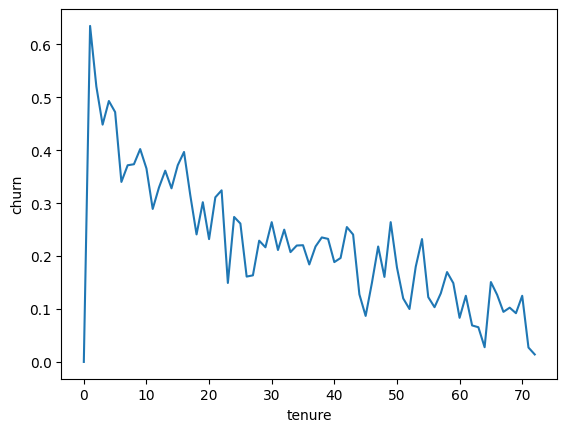

In [22]:
tenure_churn = df_train_full.groupby('tenure').churn.agg('mean')

sns.lineplot(x=tenure_churn.index, y=tenure_churn)

In [23]:
# define bins 
df_train_full[df_train_full['totalcharges'] > 1000].totalcharges.count(), df_train_full[df_train_full['totalcharges'] <= 1000].totalcharges.count()

(np.int64(3298), np.int64(2336))

/tmp/ipykernel_46555/1609239513.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('totalcharges_binned')


<Axes: xlabel='totalcharges_binned', ylabel='mean'>

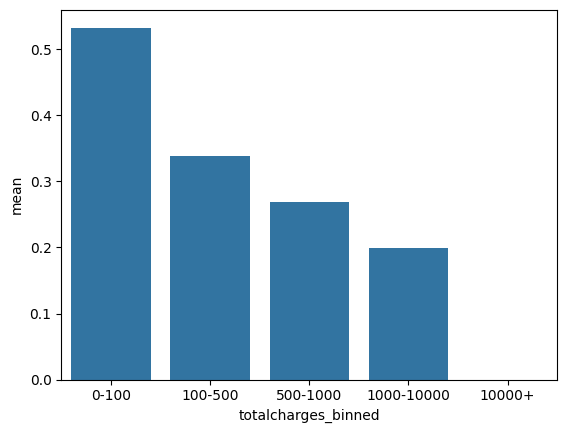

In [24]:
bins = [0, 100, 500, 1000, 10000, np.inf]
labels = ['0-100', '100-500', '500-1000', '1000-10000', '10000+']

df_train_full['totalcharges_binned'] = pd.cut(df_train_full.totalcharges, bins=bins, labels=labels)

total_charges_churn = (
    df_train_full
    .groupby('totalcharges_binned')
    .churn
    .agg(['mean', 'count'])
    .reset_index()
)

sns.barplot(x='totalcharges_binned', y='mean', data=total_charges_churn)

In [25]:
from sklearn.feature_extraction import DictVectorizer 
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)


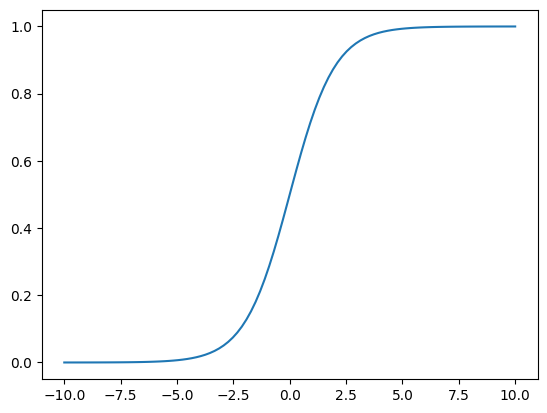

In [26]:
# Let's use the sigmoid 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)

plt.plot(z, sigmoid(z))

## Actually train the model now!

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2300)
model.fit(X_train, y_train)

model.intercept_[0], model.coef_.round(3)


(np.float64(-0.045323382519725265),
 array([[ 0.685,  0.039, -0.682,  0.056, -0.015,  0.114, -0.16 ,  0.087,
          0.039,  0.002, -0.497,  0.698, -0.16 , -0.018, -0.187,  0.066,
          0.162,  0.117, -0.16 ,  0.084,  0.285, -0.16 , -0.084, -0.161,
          0.202, -0.045,  0.086, -0.052, -0.003,  0.106, -0.011,  0.066,
         -0.025,  0.194, -0.094, -0.16 ,  0.295, -0.054, -0.16 ,  0.255,
          0.235, -0.16 , -0.034, -0.069,  0.   ]]))

In [40]:
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)